## Hologram reconstruction code

In [1]:
import utilities as ut
import numpy as np
import matplotlib.pyplot as plt

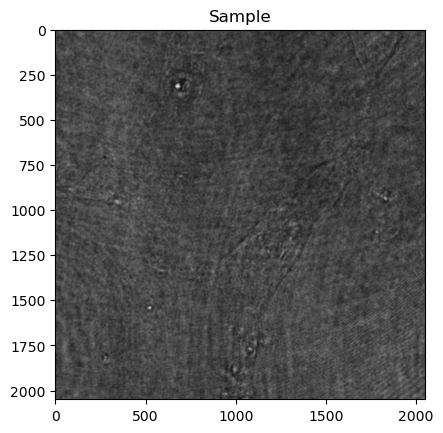

In [32]:
# Lines to read the hologram
hologram = ut.imageRead('Glioblastoma.jpg')
ut.imageShow(hologram, 'Sample')

width, height = (np.array(hologram)).shape

In [33]:
# Parameters of reconstruction (everything must be same units)
wavelength = 0.532
dxy = 2.4
distance = 0

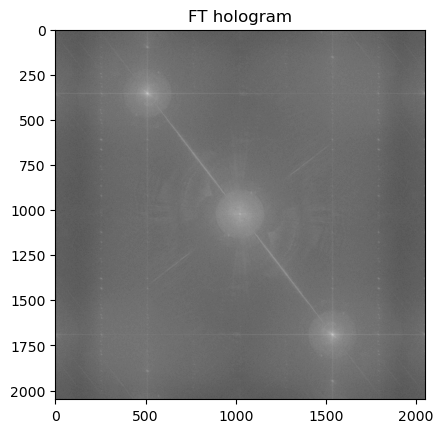

In [34]:
# Compute the FT of the hologram
ft_holo = ut.ft(hologram)
ut.imageShow(ut.intensity(ft_holo, True), 'FT hologram')

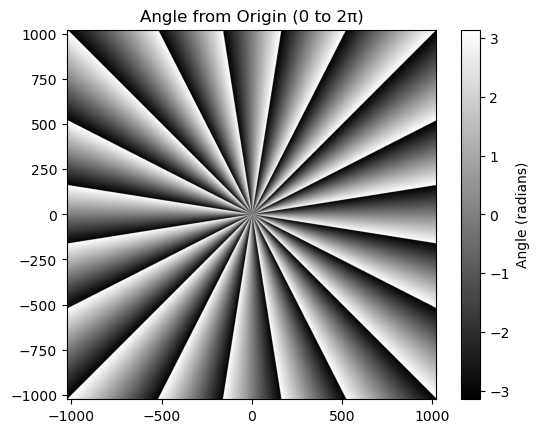

In [35]:
# Define the size of the image
size = width 

# Generate a grid of x and y coordinates
y, x = np.ogrid[-size//2:size//2, -size//2:size//2]

# Compute the angle from the origin in radians, and wrap it to the range [0, 2π]
angle = np.arctan2(y, x)  # Angle in radians from -π to π
l = 20
vortex = np.exp(1j * l * angle)

# Plot the result
plt.imshow(np.angle(vortex), cmap='gray', extent=(-size//2, size//2, -size//2, size//2))
plt.colorbar(label="Angle (radians)")
plt.title("Angle from Origin (0 to 2π)")
plt.show()

In [36]:
ft_vortex = ut.ft(vortex)

#plt.imshow(np.angle(ft_vortex, True), cmap='grey', extent=(-size//2, size//2, -size//2, size//2))

Text(0.5, 1.0, 'Hologram and vortex convolution in spectra')

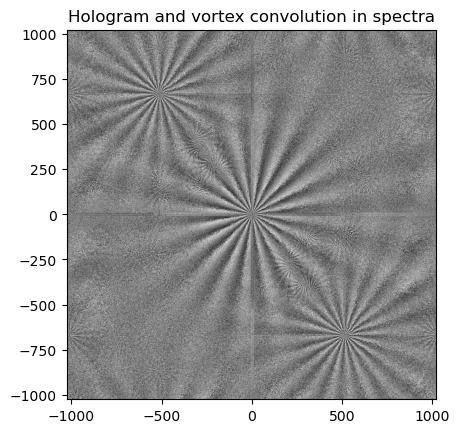

In [37]:
conv = (hologram * vortex)
ift_conv = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(conv)))


plt.imshow(np.angle(ift_conv), cmap='grey', extent=(-size//2, size//2, -size//2, size//2))
plt.title("Hologram and vortex convolution in spectra")

In [11]:
hey = ut.vortexConvolution(hologram, l_vortex= 1, plot = False)

Spatial filtering process started.....
Spatial filtering process finished.
Minimization process started.....
Minimization process finished. Cost function value = 0.852078087823777
Minization process time = 50.31138062477112
fx:  511.76897035675836
fy:  356.72883480596363
Phase compensation started....


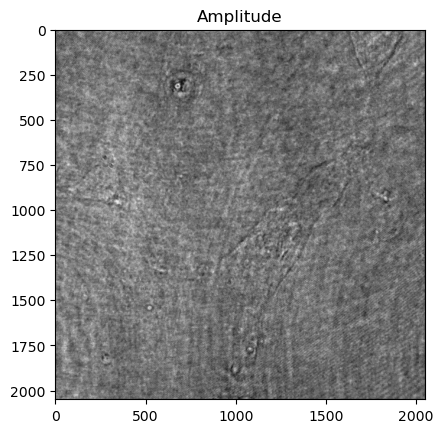

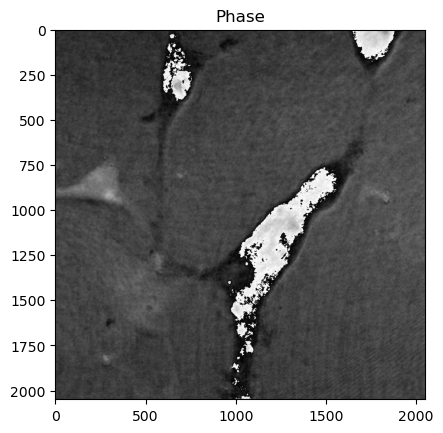

In [38]:
# numerical reconstruction with vortex
complexObject, res = ut.reconstruction_vortex_v2(hologram, wavelength, dxy, 100, l_vortex = 1.05)
amplitude = ut.amplitude(complexObject, False)
phase = ut.phase(complexObject)
ut.imageShow(amplitude, 'Amplitude')
ut.imageShow(phase, 'Phase')


Spatial filtering process started.....
Spatial filtering process finished.
Minimization process started.....
Minimization process finished. Cost function value = 1.3964786917759628
Minization process time = 10.996928930282593
fx:  351.11616377290693
fy:  899.4161391001953
Phase compensation started....


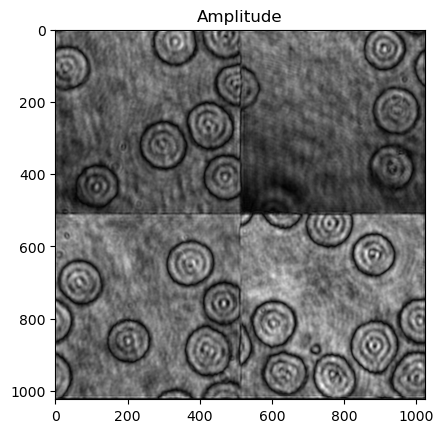

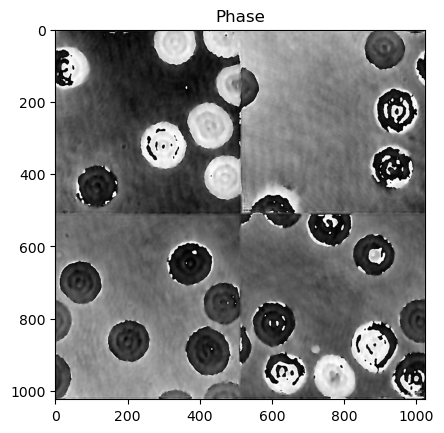

In [10]:
# numerical reconstruction with vortex
complexObject, res = ut.reconstruction_vortex(hologram, wavelength, dxy, 500, l_vortex = 1)
amplitude = ut.amplitude(complexObject, False)
phase = ut.phase(complexObject)
ut.imageShow(amplitude, 'Amplitude')
ut.imageShow(phase, 'Phase')

Spatial filtering process started.....
Spatial filtering process finished.
Minimization process started.....
Minimization process finished. Cost function value = 1.825913533049255
Minization process time = 3.9778859615325928
fx:  511.0
fy:  358.0
Phase compensation started....


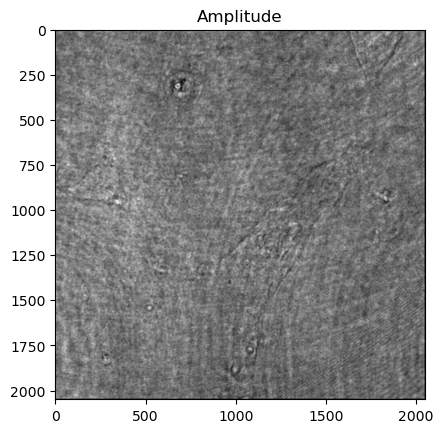

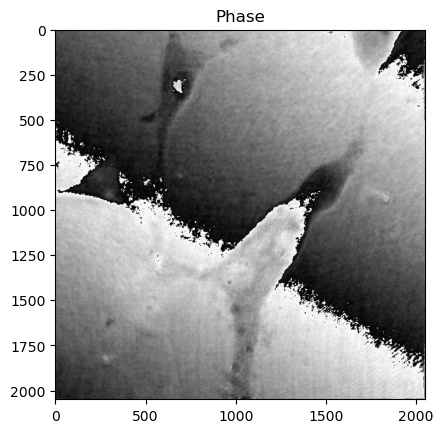

In [39]:
# numerical reconstruction with vortex
complexObject, res = ut.reconstruction(hologram, wavelength, dxy, 500)
amplitude = ut.amplitude(complexObject, False)
phase = ut.phase(complexObject)
ut.imageShow(amplitude, 'Amplitude')
ut.imageShow(phase, 'Phase')